# A quick guide to pysinopsis

Here we will go through the core class of pysinopsis (`SinopsisCube`) and showcase its core capabilities.
Note that the main use case of pysinopsis is the analysis of datacubes, which is what we show here. Minimal support for 1D fits is provided by the `Sinopsis1D` class.

Let's start by importing the class (along with seaborn for styling purposes):

In [1]:
from pysinopsis.output import SinopsisCube
import seaborn as sns

sns.set_style('ticks')

Let's define our SINOPSIS directory, this is the directory where SINOPSIS was run and it should contain all inputs, outputs and config.

In [2]:
sinopsis_dir = 'C:/Users/ariel/Workspace/GASP/High-z/SINOPSIS/A370_01/'

Now we will instanciate the SinopsisCube class, which automatically detects different output files based on the SINOPSIS config and organizes all output.

In [3]:
sinopsis_cube = SinopsisCube(sinopsis_dir)

There you have it, all in one place! 

For example, the derived properties contained in the results cube are stored in a dictionary of masked arrays that can be accessed in `sinopsis_cube.properties`.

A full list of attributes is available in the end of this example.

In [4]:
sinopsis_cube.properties.keys()

odict_keys(['Dl', 'z', 'redchi', 'Z', 'nrun', 'neqw', 'Av_y', 'Av_y_m', 'Av_y_M', 'Av', 'Av_m', 'Av_M', 'SFR1', 'SFR1_m', 'SFR1_M', 'SFR2', 'SFR2_m', 'SFR2_M', 'SFR3', 'SFR3_m', 'SFR3_M', 'SFR4', 'SFR4_m', 'SFR4_M', 'Mb1_3', 'Mb2_3', 'Mb3_3', 'Mb4_3', 'Mb1_2', 'Mb1_m_2', 'Mb1_M_2', 'Mb2_2', 'Mb2_m_2', 'Mb2_M_2', 'Mb3_2', 'Mb3_m_2', 'Mb3_M_2', 'Mb4_2', 'Mb4_m_2', 'Mb4_M_2', 'Mb1_1', 'Mb2_1', 'Mb3_1', 'Mb4_1', 'AMass3', 'AMass3_m', 'AMass3_M', 'TotMass3', 'AMass2', 'AMass2_m', 'AMass2_M', 'TotMass2', 'AMass1', 'AMass1_m', 'AMass1_M', 'TotMass1', 'lVwage', 'lVwage_m', 'lVwage_M', 'lwage', 'lwage_m', 'lwage_M', 'mwage', 'mwage_m', 'mwage_M', 'sfr_1', 'sfr_2', 'sfr_3', 'sfr_4', 'sfr_5', 'sfr_6', 'sfr_7', 'sfr_8', 'sfr_9', 'sfr_10', 'sfr_11', 'sfr_12', 'ebv_1', 'ebv_2', 'ebv_3', 'ebv_4', 'ebv_5', 'ebv_6', 'ebv_7', 'ebv_8', 'ebv_9', 'ebv_10', 'ebv_11', 'ebv_12'])

All of the output is stored in masked arrays to make computations and plots easier (you don't have to worry about all the -999).

The fitted spectra are stored in a masked array with the same shape as the input cube, and you can check the shape with the following:

In [5]:
sinopsis_cube.cube_shape

(3681, 51, 100)

And the cubes can be accessed as follows:

In [ ]:
sinopsis_cube.f_obs # Observed cube
sinopsis_cube.f_syn # Synthetic cube
sinopsis_cube.f_syn_cont # Synthetic continuum cube
sinopsis_cube.wl # Wavelength array

The SFH is also stored in a masked array, and its shape has the same spatial dimensions as the spectral cube, but its depth is equal to the number of ages (`sinopsis_cube.n_ages`):

In [ ]:
sinopsis_cube.sfh

The class also has methods to make it easier to plot results. For example, to plot the spectrum at coordinate x=30 and y=30:

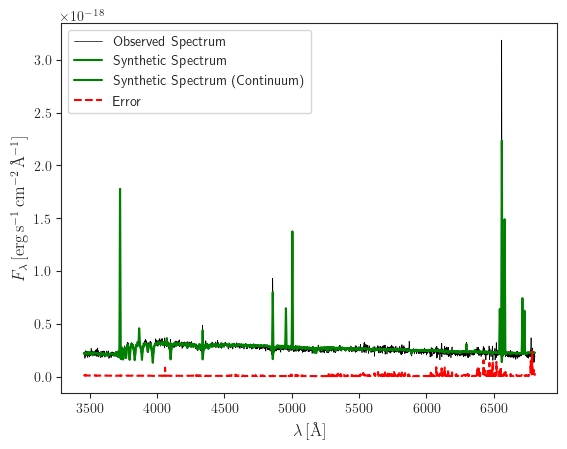

In [6]:
sinopsis_cube.plot_spectrum(30, 30)

Note that the data for this particular spectrum would be acessed as follows, and that all fluxes are automatically converted to $\mathrm{erg / s / cm^2/ \AA}$ using the flux unit given in the cube header.

In [ ]:
sinopsis_cube.f_obs[:, 30, 30]

If you want a full diagnostic plot showcasing everything that is wrong with your fit, you can also get that! Just type in the coordinates of the spaxel that you want to inspect:

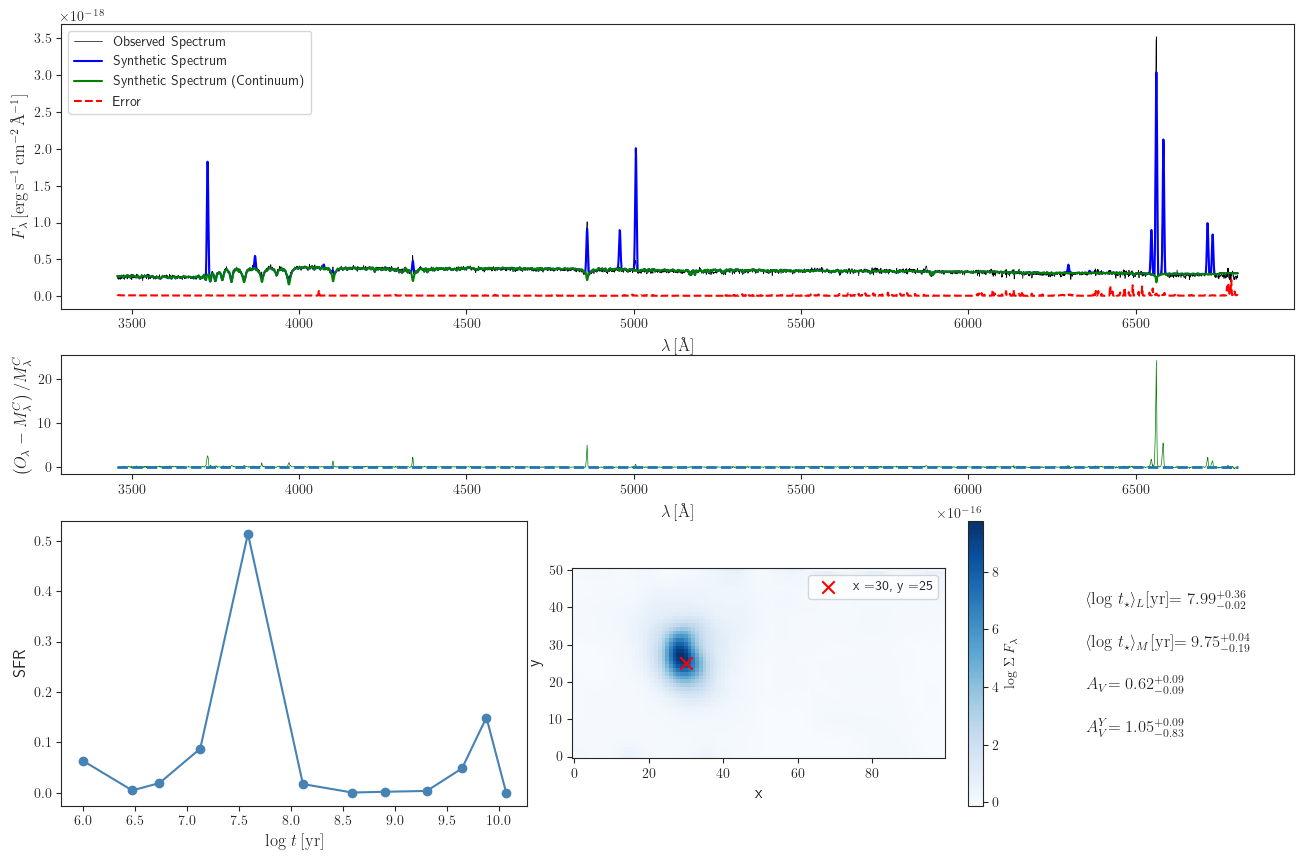

In [7]:
sinopsis_cube.plot_fit_complete(25, 30)

Lastly, you can also plot maps of physical properties from the results cube (`sinopsis_cube.properties`), just pass the name of the property to the `plot_map` method.

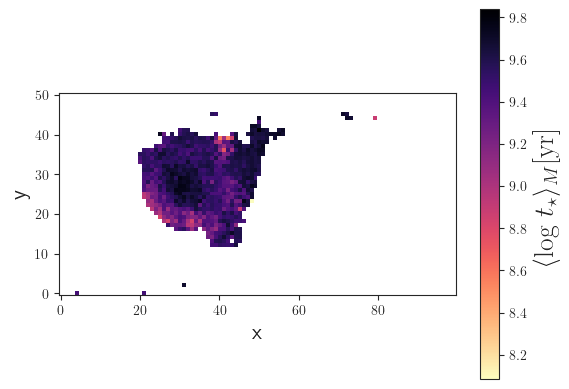

In [8]:
sinopsis_cube.plot_map('mwage')

Full list of class attributes:

`config`: Dictionary with information of the configuration used to run SINOPSIS.

`catalog`: Dictionary with catalog file information.

`galaxy_id`: Object name.

`obs_file`: Observed datacube file name.

`sinopsis_directory`: Directory (as given in the input).

`header_info`: Header of the results cube.

`properties`: Dictionary of masked arrays containing derived properties.

`velocity_dispersion`: Velocity dispersion as a masked array (if available).

`n_ages`: Number of stellar population ages.

`age_bins`: Limits of the age bins used in the fit.

`age_bin_width`: Width of the age bins

`age_bins_4`: Limits of the 4 reduced age bins.

`age_bin_center`: Central age of the bins.

`sfh`: SFH cube.

`integrated_sfh`: Integrated SFH of all non-masked spaxels.

`mask`: Mask indicating valid spaxels.

`obs_header`: Header of the observed cube.

`flux_unit`: Flux unit of the spectra.

`flux_unit_err`: Flux unit of the errors.

`wl`: Wavelength array.

`f_obs`: Observed flux (masked array).

`f_err`: Errors (masked array).

`f_syn`: Model flux (masked array).

`f_syn_cont`: Model continuum flux (masked array).

`cube_shape`: Shape of the data cube


Other attributes are `mag` (magnitudes), `eqw` (equivalent widths) and `emission_only` (emission-only cube) are only read if the `memory_saving` option of the class is set to `False` (default option).